# Soal Data Science Academy

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

## Cleaning Dataset 1: Bulan Januari

In [2]:
file = open('Harga-Harian-Bapok-Januari-2018.csv','r')

In [3]:
files = file.readlines()

In [4]:
def tambahPetikDua(x):
    tanggal=''
    harga=''
    nama=''
    l=0
    r=len(x)-1
    while(x[l]!=','):
        tanggal=tanggal+x[l]
        l+=1
    while(x[r]!=','):
        harga=x[r]+harga
        r-=1
    for i in range(l+1,r):
        nama=nama+x[i]
    return tanggal + ',"' + nama + '",' + harga

In [5]:
for i in range(1,len(files)):
    files[i]=tambahPetikDua(files[i])


In [6]:
print(files[1])

02/01/2018,"Beras",11340



In [7]:
data = open('Januari1.csv','w') 
for i in range(0,len(files)):    
    data.write(files[i])
data.close()

In [8]:
data1=pd.read_csv('Januari1.csv')

In [9]:
data1.columns

Index(['TANGGAL', 'KOMODITI', 'HARGA'], dtype='object')

In [10]:
data1.iloc[:25]

,TANGGAL,KOMODITI,HARGA
0,02/01/2018,Beras,11340
1,02/01/2018,Gula Pasir,13740
2,02/01/2018,Minyak Goreng Bimoli Botol,14040
3,02/01/2018,Minyak Goreng Curah,12388
4,02/01/2018,"Daging Sapi, Lokal, Paha Belakang",117660
5,02/01/2018,"Daging Sapi, Lokal, Daging, Has Luar (Sirloin)",118333
6,02/01/2018,"Daging Sapi, Lokal, Daging, Sandung Lamur (Bri...",89167
7,02/01/2018,"Daging Sapi, Lokal, Daging, Tetelan",70833
8,02/01/2018,"Daging Sapi, Impor, Beku",120000
9,02/01/2018,"Daging Sapi, Lokal, Has Dalam",143333


In [11]:
data1.dtypes

TANGGAL     object
KOMODITI    object
HARGA        int64
dtype: object

In [12]:
#ubah nama kolom
data1.rename(columns={'TANGGAL':'tanggal'},inplace=True)
data1.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data1.rename(columns={'HARGA':'harga'},inplace=True)

In [13]:
data1.head()

,tanggal,komoditi,harga
0,02/01/2018,Beras,11340
1,02/01/2018,Gula Pasir,13740
2,02/01/2018,Minyak Goreng Bimoli Botol,14040
3,02/01/2018,Minyak Goreng Curah,12388
4,02/01/2018,"Daging Sapi, Lokal, Paha Belakang",117660


In [14]:
print(len(data1))

814


In [15]:
#mengubah tanggal yang semula string menjadi datetime
data1['tanggal'] = pd.to_datetime(data1['tanggal'], format='%d/%m/%Y')

In [16]:
data1.head()

,tanggal,komoditi,harga
0,2018-01-02,Beras,11340
1,2018-01-02,Gula Pasir,13740
2,2018-01-02,Minyak Goreng Bimoli Botol,14040
3,2018-01-02,Minyak Goreng Curah,12388
4,2018-01-02,"Daging Sapi, Lokal, Paha Belakang",117660


In [17]:
data1['tanggal'].nunique()

22

In [18]:
data1.dtypes

tanggal     datetime64[ns]
komoditi            object
harga                int64
dtype: object

In [19]:
#casting to float
data1['harga'] = data1['harga'].astype(float)

In [20]:
data1.to_csv('1b.csv', index=False)

## Cleaning Dataset 2: Bulan Februari

In [21]:
file = open('Harga-Harian-Bapok-Februari-2018.csv','r')

In [22]:
files = file.readlines()

In [23]:
# Tambah petik 2
def tambahPetikDua1(x):
    tanggal=''
    harga=''
    nama=''
    satuan=''
    l=0
    r=len(x)-1
    while(x[l]!=','):
        tanggal=tanggal+x[l]
        l+=1
    while(x[r]!=','):
        harga=x[r]+harga
        r-=1
    r-=1
    while(x[r]!=','):
        satuan=x[r]+satuan
        r-=1
    for i in range(l+1,r):
        nama=nama+x[i]
    return tanggal + ',"' + nama + '",'+satuan+',' + harga

In [24]:
for i in range(1,len(files)):
    files[i]=tambahPetikDua1(files[i])

In [25]:
print(files[6])

08/02/2018,"Beras Medium",Kg,11.000



In [26]:
# Save to file
data = open('Februari1.csv','w') 
for i in range(0,len(files)):    
    data.write(files[i])
data.close()

In [27]:
# Load the file as pandas dataframe
data2=pd.read_csv('Februari1.csv')

In [28]:
data2.columns

Index(['TANGGAL', 'KOMODITI', 'SATUAN', 'HARGA'], dtype='object')

In [29]:
data2.iloc[:25]

,TANGGAL,KOMODITI,SATUAN,HARGA
0,01/02/2018,Beras Medium,Kg,10.863
1,02/02/2018,Beras Medium,Kg,10.863
2,05/02/2018,Beras Medium,Kg,10.890
3,06/02/2018,Beras Medium,Kg,11.170
4,07/02/2018,Beras Medium,Kg,11.040
5,08/02/2018,Beras Medium,Kg,11.000
6,09/02/2018,Beras Medium,Kg,11.380
7,12/02/2018,Beras Medium,Kg,11.270
8,13/02/2018,Beras Medium,Kg,11.180
9,14/02/2018,Beras Medium,Kg,11.620


In [30]:
data2.dtypes

TANGGAL      object
KOMODITI     object
SATUAN       object
HARGA       float64
dtype: object

In [31]:
#ubah nama kolom
data2.rename(columns={'TANGGAL':'tanggal'},inplace=True)
data2.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data2.rename(columns={'HARGA':'harga'},inplace=True)

In [32]:
#drop kolom satuan
data2 = data2.drop("SATUAN",axis = 1)

In [33]:
#menjadikan harga dalam format ribuan
data2["harga"] *= 1000

In [34]:
print(len(data2))

722


In [35]:
#mengubah tanggal yang semula string menjadi datetime
data2['tanggal'] = pd.to_datetime(data2['tanggal'], format='%d/%m/%Y')

In [36]:
data2.head()

,tanggal,komoditi,harga
0,2018-02-01,Beras Medium,10863.0
1,2018-02-02,Beras Medium,10863.0
2,2018-02-05,Beras Medium,10890.0
3,2018-02-06,Beras Medium,11170.0
4,2018-02-07,Beras Medium,11040.0


In [37]:
data2['tanggal'].nunique()

19

In [38]:
data2.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [39]:
data2.to_csv('2b.csv', index=False)

## Dataset 3: Bulan Maret

In [40]:
data3 = pd.read_csv("Harga-Harian-Bapok-Maret-2018.csv")

In [41]:
data3.dtypes

TANGGAL     object
KOMODITI    object
SATUAN      object
HARGA        int64
dtype: object

In [42]:
data3.head()

,TANGGAL,KOMODITI,SATUAN,HARGA
0,01/03/2018,Beras Medium,Kg,11675
1,02/03/2018,Beras Medium,Kg,11075
2,05/03/2018,Beras Medium,Kg,10825
3,06/03/2018,Beras Medium,Kg,10660
4,07/03/2018,Beras Medium,Kg,10760


In [43]:
#mengubah nama kolom
#ubah nama kolom
data3.rename(columns={'TANGGAL':'tanggal'},inplace=True)
data3.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data3.rename(columns={'HARGA':'harga'},inplace=True)

In [44]:
#drop kolom satuan
data3 = data3.drop("SATUAN",axis = 1)

In [45]:
data3.head()

,tanggal,komoditi,harga
0,01/03/2018,Beras Medium,11675
1,02/03/2018,Beras Medium,11075
2,05/03/2018,Beras Medium,10825
3,06/03/2018,Beras Medium,10660
4,07/03/2018,Beras Medium,10760


In [46]:
#casting tipe data int ke float
data3['harga'] = data3['harga'].astype(float)

In [47]:
data3.head()

,tanggal,komoditi,harga
0,01/03/2018,Beras Medium,11675.0
1,02/03/2018,Beras Medium,11075.0
2,05/03/2018,Beras Medium,10825.0
3,06/03/2018,Beras Medium,10660.0
4,07/03/2018,Beras Medium,10760.0


In [48]:
#tanggal ke datetime
data3['tanggal'] = pd.to_datetime(data3['tanggal'], format='%d/%m/%Y')

In [49]:
data3.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [50]:
#jadiin csv
data3.to_csv('3b.csv', index=False)

## Dataset 4: Bulan April

In [51]:
data4 = pd.read_csv("Harga-Harian-Bapok-April-2018-edited.csv")

In [52]:
data4.dtypes

tanggal     object
komoditi    object
satuan      object
harga        int64
dtype: object

In [53]:
data4.head()

,tanggal,komoditi,satuan,harga
0,2018-04-02,Beras Medium,Kg,11240
1,2018-04-03,Beras Medium,Kg,11680
2,2018-04-04,Beras Medium,Kg,10940
3,2018-04-05,Beras Medium,Kg,11480
4,2018-04-06,Beras Medium,Kg,11780


In [54]:
#drop kolom satuan
data4 = data4.drop("satuan",axis = 1)

In [55]:
data4.head()

,tanggal,komoditi,harga
0,2018-04-02,Beras Medium,11240
1,2018-04-03,Beras Medium,11680
2,2018-04-04,Beras Medium,10940
3,2018-04-05,Beras Medium,11480
4,2018-04-06,Beras Medium,11780


In [56]:
#casting tipe data int ke float
data4['harga'] = data4['harga'].astype(float)

In [57]:
data4.head()

,tanggal,komoditi,harga
0,2018-04-02,Beras Medium,11240.0
1,2018-04-03,Beras Medium,11680.0
2,2018-04-04,Beras Medium,10940.0
3,2018-04-05,Beras Medium,11480.0
4,2018-04-06,Beras Medium,11780.0


In [58]:
#tanggal ke datetime
data4['tanggal'] = pd.to_datetime(data4['tanggal'], format='%Y-%m-%d')

In [59]:
data4.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [60]:
#jadiin csv
data4.to_csv('4b.csv', index=False) 

## Dataset 5: Bulan Mei

In [61]:
file = open('Harga-Harian-Bapok-Mei-2018.csv','r')

In [62]:
files = file.readlines()

In [63]:
for i in range(1,len(files)):
    files[i]=tambahPetikDua1(files[i])

In [64]:
print(files[107])

11/05/2018,"Daging Sapi, Lokal, Paha Belakang",Kg,119660



In [65]:
data = open('Mei1.csv','w') 
for i in range(0,len(files)):    
    data.write(files[i])
data.close()

In [66]:
data5=pd.read_csv('Mei1.csv')

In [67]:
data5.columns

Index(['TANGGAL', 'KOMODITI', 'SATUAN', 'HARGA'], dtype='object')

In [68]:
#ubah nama kolom
data5.rename(columns={'TANGGAL':'tanggal'},inplace=True)
data5.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data5.rename(columns={'HARGA':'harga'},inplace=True)

In [69]:
data5.dtypes

tanggal     object
komoditi    object
SATUAN      object
harga        int64
dtype: object

In [70]:
#drop kolom satuan
data5 = data5.drop("SATUAN",axis = 1)

In [71]:
#mengubah tanggal yang semula string menjadi datetime
data5['tanggal'] = pd.to_datetime(data5['tanggal'], format='%d/%m/%Y')

In [72]:
data5['harga'] = data5['harga'].astype(float)

In [73]:
data5.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [74]:
data5.to_csv('5b.csv', index=False)

## Dataset 6: Bulan Juni

In [75]:
file = open('Harga-Harian-Bapok-Juni-2018.csv','r')
#file = open('Juni.csv','r')

In [76]:
files = file.readlines()

In [77]:
for i in range(1,len(files)):
    files[i]=tambahPetikDua1(files[i])


In [78]:
print(files[1])

04/06/2018,"Beras Medium",Kg,10780



In [79]:
data = open('Juni1.csv','w') 
for i in range(0,len(files)):    
    data.write(files[i])
data.close()

In [80]:
data6=pd.read_csv('Juni1.csv')

In [81]:
data6.columns

Index(['TANGGAL', 'KOMODITI', 'SATUAN', 'HARGA'], dtype='object')

In [82]:
data6.iloc[:25]

,TANGGAL,KOMODITI,SATUAN,HARGA
0,04/06/2018,Beras Medium,Kg,10780
1,05/06/2018,Beras Medium,Kg,10820
2,06/06/2018,Beras Medium,Kg,10970
3,07/06/2018,Beras Medium,Kg,10920
4,08/06/2018,Beras Medium,Kg,11030
5,21/06/2018,Beras Medium,Kg,10920
6,22/06/2018,Beras Medium,Kg,11080
7,25/06/2018,Beras Medium,Kg,10720
8,26/06/2018,Beras Medium,Kg,10820
9,28/06/2018,Beras Medium,Kg,10920


In [83]:
data6.dtypes

TANGGAL     object
KOMODITI    object
SATUAN      object
HARGA        int64
dtype: object

In [84]:
#ubah nama kolom
data6.rename(columns={'TANGGAL':'tanggal'},inplace=True)
data6.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data6.rename(columns={'HARGA':'harga'},inplace=True)

In [85]:
#drop kolom satuan
data6 = data6.drop("SATUAN",axis = 1)

In [86]:
data6.head()

,tanggal,komoditi,harga
0,04/06/2018,Beras Medium,10780
1,05/06/2018,Beras Medium,10820
2,06/06/2018,Beras Medium,10970
3,07/06/2018,Beras Medium,10920
4,08/06/2018,Beras Medium,11030


In [87]:
print(len(data6))

418


In [88]:
#mengubah tanggal yang semula string menjadi datetime
data6['tanggal'] = pd.to_datetime(data6['tanggal'], format='%d/%m/%Y')

In [89]:
data6.head()

,tanggal,komoditi,harga
0,2018-06-04,Beras Medium,10780
1,2018-06-05,Beras Medium,10820
2,2018-06-06,Beras Medium,10970
3,2018-06-07,Beras Medium,10920
4,2018-06-08,Beras Medium,11030


In [90]:
data6['tanggal'].nunique()

11

In [91]:
data6.dtypes

tanggal     datetime64[ns]
komoditi            object
harga                int64
dtype: object

In [92]:
#casting to float
data6['harga'] = data6['harga'].astype(float)

In [93]:
data6.to_csv('6b.csv', index=False)

## Dataset 7: Bulan Juli

In [94]:
data7 = pd.read_csv("Harga-Harian-Bapok-Juli-2018-edited.csv")

In [95]:
data7.dtypes

tanggal     object
komoditi    object
satuan      object
harga        int64
dtype: object

In [96]:
data7.head()

,tanggal,komoditi,satuan,harga
0,2018-07-02,Beras Medium,Kg,10820
1,2018-07-03,Beras Medium,Kg,10980
2,2018-07-04,Beras Medium,Kg,10980
3,2018-07-05,Beras Medium,Kg,10720
4,2018-07-06,Beras Medium,Kg,10820


In [97]:
#drop kolom satuan
data7 = data7.drop("satuan",axis = 1)

In [98]:
data7.head()

,tanggal,komoditi,harga
0,2018-07-02,Beras Medium,10820
1,2018-07-03,Beras Medium,10980
2,2018-07-04,Beras Medium,10980
3,2018-07-05,Beras Medium,10720
4,2018-07-06,Beras Medium,10820


In [99]:
#casting tipe data int ke float
data7['harga'] = data7['harga'].astype(float)

In [100]:
data7.head()

,tanggal,komoditi,harga
0,2018-07-02,Beras Medium,10820.0
1,2018-07-03,Beras Medium,10980.0
2,2018-07-04,Beras Medium,10980.0
3,2018-07-05,Beras Medium,10720.0
4,2018-07-06,Beras Medium,10820.0


In [101]:
#tanggal ke datetime
data7['tanggal'] = pd.to_datetime(data7['tanggal'], format='%Y-%m-%d')

In [102]:
data7.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [103]:
#jadiin csv
data7.to_csv('7b.csv', index=False)

## Dataset 8: Bulan Agustus

In [104]:
data8 = pd.read_csv("Harga-Harian-Bapok-Agustus-2018-edited.csv")

In [105]:
data8.dtypes

tanggal     object
komoditi    object
satuan      object
harga        int64
dtype: object

In [106]:
data8.head()

,tanggal,komoditi,satuan,harga
0,2018-08-01,Beras Medium,Kg,10800
1,2018-08-02,Beras Medium,Kg,10900
2,2018-08-03,Beras Medium,Kg,10550
3,2018-08-06,Beras Medium,Kg,10600
4,2018-08-07,Beras Medium,Kg,10600


In [107]:
#drop kolom satuan
data8 = data8.drop("satuan",axis = 1)

In [108]:
data8.head()

,tanggal,komoditi,harga
0,2018-08-01,Beras Medium,10800
1,2018-08-02,Beras Medium,10900
2,2018-08-03,Beras Medium,10550
3,2018-08-06,Beras Medium,10600
4,2018-08-07,Beras Medium,10600


In [109]:
#casting tipe data int ke float
data8['harga'] = data8['harga'].astype(float)

In [110]:
data8.head()

,tanggal,komoditi,harga
0,2018-08-01,Beras Medium,10800.0
1,2018-08-02,Beras Medium,10900.0
2,2018-08-03,Beras Medium,10550.0
3,2018-08-06,Beras Medium,10600.0
4,2018-08-07,Beras Medium,10600.0


In [111]:
#tanggal ke datetime
data8['tanggal'] = pd.to_datetime(data8['tanggal'], format='%Y/%m/%d')

In [112]:
data8.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [113]:
#jadiin csv
data8.to_csv('8b.csv', index=False)

## Dataset 9: Bulan September

In [114]:
data9 = pd.read_csv("Harga-Harian-Bapok-September-2018-revised.csv")

In [115]:
data9.dtypes

tanggal     object
komoditi    object
satuan      object
harga        int64
dtype: object

In [116]:
data9.head()

,tanggal,komoditi,satuan,harga
0,2018-09-03,Beras Medium,Kg,10840
1,2018-09-04,Beras Medium,Kg,10840
2,2018-09-05,Beras Medium,Kg,10540
3,2018-09-06,Beras Medium,Kg,10540
4,2018-09-07,Beras Medium,Kg,10640


In [117]:
#drop kolom satuan
data9 = data9.drop("satuan",axis = 1)

In [118]:
data9.head()

,tanggal,komoditi,harga
0,2018-09-03,Beras Medium,10840
1,2018-09-04,Beras Medium,10840
2,2018-09-05,Beras Medium,10540
3,2018-09-06,Beras Medium,10540
4,2018-09-07,Beras Medium,10640


In [119]:
#casting tipe data int ke float
data9['harga'] = data9['harga'].astype(float)

In [120]:
data9.head()

,tanggal,komoditi,harga
0,2018-09-03,Beras Medium,10840.0
1,2018-09-04,Beras Medium,10840.0
2,2018-09-05,Beras Medium,10540.0
3,2018-09-06,Beras Medium,10540.0
4,2018-09-07,Beras Medium,10640.0


In [121]:
#tanggal ke datetime
data9['tanggal'] = pd.to_datetime(data9['tanggal'], format='%Y/%m/%d')

In [122]:
data9.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [123]:
#jadiin csv
data9.to_csv('9b.csv', index=False)

## Dataset 10: Bulan Oktober

In [124]:
data10 = pd.read_csv("Harga-Harian-Bapok-Oktober-2018-rev.csv")

In [125]:
data10.dtypes

tanggal     object
komoditi    object
satuan      object
harga        int64
dtype: object

In [126]:
data10.head()

,tanggal,komoditi,satuan,harga
0,2018-10-01,Beras Medium,Kg,10740
1,2018-10-02,Beras Medium,Kg,10740
2,2018-10-03,Beras Medium,Kg,10690
3,2018-10-04,Beras Medium,Kg,10640
4,2018-10-05,Beras Medium,Kg,10540


In [127]:
#drop kolom satuan
data10 = data10.drop("satuan",axis = 1)

In [128]:
data10.head()

,tanggal,komoditi,harga
0,2018-10-01,Beras Medium,10740
1,2018-10-02,Beras Medium,10740
2,2018-10-03,Beras Medium,10690
3,2018-10-04,Beras Medium,10640
4,2018-10-05,Beras Medium,10540


In [129]:
#casting tipe data int ke float
data10['harga'] = data10['harga'].astype(float)

In [130]:
data10.head()

,tanggal,komoditi,harga
0,2018-10-01,Beras Medium,10740.0
1,2018-10-02,Beras Medium,10740.0
2,2018-10-03,Beras Medium,10690.0
3,2018-10-04,Beras Medium,10640.0
4,2018-10-05,Beras Medium,10540.0


In [131]:
data10.rename(columns={'tanggal ':'tanggal'},inplace=True)

In [132]:
#tanggal ke datetime
data10['tanggal'] = pd.to_datetime(data10['tanggal'], format='%Y/%m/%d')

In [133]:
data10.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [134]:
#jadiin csv
data10.to_csv('10b.csv', index=False)

## Dataset 11: Bulan November

In [135]:
data11 = pd.read_csv('November.csv')

In [136]:
data11.head()

,tanggal,bulan,tahun,komoditi,satuan,harga
0,1,november,2018,Beras Medium,Kg,"10,860"
1,2,november,2018,Beras Medium,Kg,"10,860"
2,5,november,2018,Beras Medium,Kg,"10,760"
3,6,november,2018,Beras Medium,Kg,"10,710"
4,7,november,2018,Beras Medium,Kg,"10,760"


In [137]:
data11.describe()

,tanggal,tahun
count,798.000000,798.0
mean,15.857143,2018.0
std,9.041499,0.0
min,1.000000,2018.0
25%,8.000000,2018.0
50%,15.000000,2018.0
75%,23.000000,2018.0
max,30.000000,2018.0


In [138]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
tanggal     798 non-null int64
bulan       798 non-null object
tahun       798 non-null int64
komoditi    798 non-null object
satuan      798 non-null object
harga       798 non-null object
dtypes: int64(2), object(4)
memory usage: 37.5+ KB


In [139]:
data11.shape

(798, 6)

In [140]:
data11['komoditi'].unique()

array(['Beras Medium', 'Beras Premium', 'Gula Pasir',
       'Minyak Goreng Bimoli Botol', 'Minyak Goreng Curah',
       'Daging Sapi, Lokal, Paha Belakang',
       'Daging Sapi, Lokal, Daging, Has Luar (Sirloin)',
       'Daging Sapi, Lokal, Daging, Sandung Lamur (Brisket)',
       'Daging Sapi, Lokal, Daging, Tetelan', 'Daging Sapi, Impor, Beku',
       'Daging Sapi, Lokal, Has Dalam', 'Ayam Boiler', 'Ayam Kampung',
       'Telur Ayam Ras', 'Telur Ayam Kampung',
       'Susu Kental Manis Kaleng Merk Bendera',
       'Susu Kental Manis Kaleng Merk Indomilk',
       'Susu Bubuk Kaleng Merk Bendera',
       'Susu Bubuk Kaleng Merk Indomilk', 'Jagung Pipilan Kecil',
       'Garam Beryodium Bata', 'Garam Beryodium Halus',
       'Tepung Terigu Segitiga Biru', 'Kacang Kedelai Eks Impor',
       'Kacang Kedelai Lokal', 'Indomie Rasa Kari Ayam',
       'Cabai Merah Kriting', 'Cabai Merah Besar', 'Cabai Rawit Merah',
       'Cabai Rawit Hijau', 'Bawang Merah (Medium)',
       'Bawang Putih Im

In [141]:
data11['komoditi'].nunique()

38

In [142]:
data_temp = [11 for i in range(0,798)]

In [143]:
data11['satuan'].unique()

array(['Kg', 'Liter', 'ekor', 'butir', 'buah', '250 gr'], dtype=object)

In [144]:
data11['bulan_temp'] = data_temp

In [145]:
data11.head()

,tanggal,bulan,tahun,komoditi,satuan,harga,bulan_temp
0,1,november,2018,Beras Medium,Kg,"10,860",11
1,2,november,2018,Beras Medium,Kg,"10,860",11
2,5,november,2018,Beras Medium,Kg,"10,760",11
3,6,november,2018,Beras Medium,Kg,"10,710",11
4,7,november,2018,Beras Medium,Kg,"10,760",11


In [146]:
data11.drop("bulan", axis = 1)

,tanggal,tahun,komoditi,satuan,harga,bulan_temp
0,1,2018,Beras Medium,Kg,"10,860",11
1,2,2018,Beras Medium,Kg,"10,860",11
2,5,2018,Beras Medium,Kg,"10,760",11
3,6,2018,Beras Medium,Kg,"10,710",11
4,7,2018,Beras Medium,Kg,"10,760",11
5,8,2018,Beras Medium,Kg,"10,560",11
6,9,2018,Beras Medium,Kg,"10,760",11
7,12,2018,Beras Medium,Kg,"10,860",11
8,13,2018,Beras Medium,Kg,"10,540",11
9,14,2018,Beras Medium,Kg,"10,490",11


In [147]:
tanggal_temp = ['' for i in range(0,798)]

In [148]:
for i in range (0,798):
    tanggal_temp[i] = str(data11['bulan_temp'].iloc[i])+ '/' + str(data11['tanggal'].iloc[i]) + '/' + str(data11['tahun'].iloc[i])

In [149]:
data11.head()

,tanggal,bulan,tahun,komoditi,satuan,harga,bulan_temp
0,1,november,2018,Beras Medium,Kg,"10,860",11
1,2,november,2018,Beras Medium,Kg,"10,860",11
2,5,november,2018,Beras Medium,Kg,"10,760",11
3,6,november,2018,Beras Medium,Kg,"10,710",11
4,7,november,2018,Beras Medium,Kg,"10,760",11


In [150]:
data11['tanggal_temp'] = tanggal_temp

In [151]:
data11.head()

,tanggal,bulan,tahun,komoditi,satuan,harga,bulan_temp,tanggal_temp
0,1,november,2018,Beras Medium,Kg,"10,860",11,11/1/2018
1,2,november,2018,Beras Medium,Kg,"10,860",11,11/2/2018
2,5,november,2018,Beras Medium,Kg,"10,760",11,11/5/2018
3,6,november,2018,Beras Medium,Kg,"10,710",11,11/6/2018
4,7,november,2018,Beras Medium,Kg,"10,760",11,11/7/2018


In [152]:
data11 = data11.drop("tanggal",axis=1)
data11 = data11.drop("bulan",axis=1)
data11 = data11.drop("tahun",axis=1)
data11 = data11.drop("bulan_temp",axis=1)

In [153]:
data11.head()

,komoditi,satuan,harga,tanggal_temp
0,Beras Medium,Kg,"10,860",11/1/2018
1,Beras Medium,Kg,"10,860",11/2/2018
2,Beras Medium,Kg,"10,760",11/5/2018
3,Beras Medium,Kg,"10,710",11/6/2018
4,Beras Medium,Kg,"10,760",11/7/2018


In [154]:
data11.rename(columns={'tanggal_temp':'tanggal'},inplace=True)

In [155]:
data11['tanggal'] = pd.to_datetime(data11['tanggal'], format='%m/%d/%Y')

In [156]:
cols = data11.columns.tolist()

In [157]:
cols

['komoditi', 'satuan', 'harga', 'tanggal']

In [158]:
cols = cols[-1:] + cols[:-1]

In [159]:
cols

['tanggal', 'komoditi', 'satuan', 'harga']

In [160]:
data11 = data11[cols]

In [161]:
data11.head()

,tanggal,komoditi,satuan,harga
0,2018-11-01,Beras Medium,Kg,"10,860"
1,2018-11-02,Beras Medium,Kg,"10,860"
2,2018-11-05,Beras Medium,Kg,"10,760"
3,2018-11-06,Beras Medium,Kg,"10,710"
4,2018-11-07,Beras Medium,Kg,"10,760"


In [162]:
data11.dtypes

tanggal     datetime64[ns]
komoditi            object
satuan              object
harga               object
dtype: object

In [163]:
data11 = data11.drop("satuan",axis = 1)

In [164]:
data11.dtypes

tanggal     datetime64[ns]
komoditi            object
harga               object
dtype: object

In [165]:
data11.shape

(798, 3)

In [166]:
def nama(x):
    s = ''
    for i in range (0,len(x)):
        if(x[i] != ','):
            s = s+x[i]
    return s

In [167]:
for i in range(0,798):
    data11.at[i,'harga'] = nama(data11.at[i,'harga'])

In [168]:
data11['harga'] = data11['harga'].astype(float)

In [169]:
data11.head()

,tanggal,komoditi,harga
0,2018-11-01,Beras Medium,10860.0
1,2018-11-02,Beras Medium,10860.0
2,2018-11-05,Beras Medium,10760.0
3,2018-11-06,Beras Medium,10710.0
4,2018-11-07,Beras Medium,10760.0


In [170]:
data11.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [171]:
data11.to_csv('11b.csv', index=False)

## Dataset 12: Bulan Desember

In [172]:
data12 = pd.read_csv("Harga-Harian-Bapok-Desember-2018.csv")

In [173]:
data12.head()

,TANGGAL,BULAN,TAHUN,KOMODITI,SATUAN,HARGA
0,3.0,Desember,2018.0,Beras Medium,Kg,10790.0
1,4.0,Desember,2018.0,Beras Medium,Kg,10590.0
2,5.0,Desember,2018.0,Beras Medium,Kg,10500.0
3,6.0,Desember,2018.0,Beras Medium,Kg,10450.0
4,7.0,Desember,2018.0,Beras Medium,Kg,10500.0


In [174]:
data12.dtypes

TANGGAL     float64
BULAN        object
TAHUN       float64
KOMODITI     object
SATUAN       object
HARGA       float64
dtype: object

In [175]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
TANGGAL     722 non-null float64
BULAN       722 non-null object
TAHUN       722 non-null float64
KOMODITI    722 non-null object
SATUAN      722 non-null object
HARGA       722 non-null float64
dtypes: float64(3), object(3)
memory usage: 34.0+ KB


In [176]:
data12 = data12.iloc[:-1]

In [177]:
data12.tail()

,TANGGAL,BULAN,TAHUN,KOMODITI,SATUAN,HARGA
717,21.0,Desember,2018.0,Ketela Pohon,Kg,5340.0
718,26.0,Desember,2018.0,Ketela Pohon,Kg,5340.0
719,27.0,Desember,2018.0,Ketela Pohon,Kg,5340.0
720,28.0,Desember,2018.0,Ketela Pohon,Kg,5340.0
721,31.0,Desember,2018.0,Ketela Pohon,Kg,5340.0


In [178]:
data12['TANGGAL'] = data12['TANGGAL'].astype(int)
data12['TAHUN'] = data12['TAHUN'].astype(int)

In [179]:
data12.head()

,TANGGAL,BULAN,TAHUN,KOMODITI,SATUAN,HARGA
0,3,Desember,2018,Beras Medium,Kg,10790.0
1,4,Desember,2018,Beras Medium,Kg,10590.0
2,5,Desember,2018,Beras Medium,Kg,10500.0
3,6,Desember,2018,Beras Medium,Kg,10450.0
4,7,Desember,2018,Beras Medium,Kg,10500.0


In [180]:
data12.shape

(722, 6)

In [181]:
bulan_temp = [12 for i in range(0,722)]

In [182]:
data12['bulan'] = bulan_temp

In [183]:
tanggal = ['' for i in range(0,722)]
for i in range (0,722):
    tanggal[i] = str(data12['TANGGAL'].iloc[i]) + '/' + str(data12['bulan'].iloc[i]) + '/' + str(data12['TAHUN'].iloc[i])

In [184]:
data12['tanggal'] = tanggal

In [185]:
data12.head()

,TANGGAL,BULAN,TAHUN,KOMODITI,SATUAN,HARGA,bulan,tanggal
0,3,Desember,2018,Beras Medium,Kg,10790.0,12,3/12/2018
1,4,Desember,2018,Beras Medium,Kg,10590.0,12,4/12/2018
2,5,Desember,2018,Beras Medium,Kg,10500.0,12,5/12/2018
3,6,Desember,2018,Beras Medium,Kg,10450.0,12,6/12/2018
4,7,Desember,2018,Beras Medium,Kg,10500.0,12,7/12/2018


In [186]:
data12 = data12.drop("TANGGAL",axis = 1)
data12 = data12.drop("BULAN",axis = 1)
data12 = data12.drop("TAHUN",axis = 1)
data12 = data12.drop("bulan",axis = 1)
data12 = data12.drop("SATUAN",axis = 1)

In [187]:
data12.head()

,KOMODITI,HARGA,tanggal
0,Beras Medium,10790.0,3/12/2018
1,Beras Medium,10590.0,4/12/2018
2,Beras Medium,10500.0,5/12/2018
3,Beras Medium,10450.0,6/12/2018
4,Beras Medium,10500.0,7/12/2018


In [188]:
data12.rename(columns={'KOMODITI':'komoditi'},inplace=True)
data12.rename(columns={'HARGA':'harga'},inplace=True)

In [189]:
cols = data12.columns.tolist()
cols

['komoditi', 'harga', 'tanggal']

In [190]:
cols = cols[-1:] + cols[:-1]
cols

['tanggal', 'komoditi', 'harga']

In [191]:
data12 = data12[cols]

In [192]:
data12.head()

,tanggal,komoditi,harga
0,3/12/2018,Beras Medium,10790.0
1,4/12/2018,Beras Medium,10590.0
2,5/12/2018,Beras Medium,10500.0
3,6/12/2018,Beras Medium,10450.0
4,7/12/2018,Beras Medium,10500.0


In [193]:
data12['tanggal'] = pd.to_datetime(data12['tanggal'], format='%d/%m/%Y')

In [194]:
data12.head()

,tanggal,komoditi,harga
0,2018-12-03,Beras Medium,10790.0
1,2018-12-04,Beras Medium,10590.0
2,2018-12-05,Beras Medium,10500.0
3,2018-12-06,Beras Medium,10450.0
4,2018-12-07,Beras Medium,10500.0


In [195]:
data12.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [196]:
data12.to_csv('12b.csv', index=False)

Now, we've done to read all datasets. The next things we're going to do is to merge all datasets.

In [197]:
data = data1
data = data.append(data2)
data = data.append(data3)
data = data.append(data4)
data = data.append(data5)
data = data.append(data6)
data = data.append(data7)
data = data.append(data8)
data = data.append(data9)
data = data.append(data10)
data = data.append(data11)
data = data.append(data12)
data

,tanggal,komoditi,harga
0,2018-01-02,Beras,11340.0
1,2018-01-02,Gula Pasir,13740.0
2,2018-01-02,Minyak Goreng Bimoli Botol,14040.0
3,2018-01-02,Minyak Goreng Curah,12388.0
4,2018-01-02,"Daging Sapi, Lokal, Paha Belakang",117660.0
5,2018-01-02,"Daging Sapi, Lokal, Daging, Has Luar (Sirloin)",118333.0
6,2018-01-02,"Daging Sapi, Lokal, Daging, Sandung Lamur (Bri...",89167.0
7,2018-01-02,"Daging Sapi, Lokal, Daging, Tetelan",70833.0
8,2018-01-02,"Daging Sapi, Impor, Beku",120000.0
9,2018-01-02,"Daging Sapi, Lokal, Has Dalam",143333.0


In [198]:
data = data.reset_index()
data

,index,tanggal,komoditi,harga
0,0,2018-01-02,Beras,11340.0
1,1,2018-01-02,Gula Pasir,13740.0
2,2,2018-01-02,Minyak Goreng Bimoli Botol,14040.0
3,3,2018-01-02,Minyak Goreng Curah,12388.0
4,4,2018-01-02,"Daging Sapi, Lokal, Paha Belakang",117660.0
5,5,2018-01-02,"Daging Sapi, Lokal, Daging, Has Luar (Sirloin)",118333.0
6,6,2018-01-02,"Daging Sapi, Lokal, Daging, Sandung Lamur (Bri...",89167.0
7,7,2018-01-02,"Daging Sapi, Lokal, Daging, Tetelan",70833.0
8,8,2018-01-02,"Daging Sapi, Impor, Beku",120000.0
9,9,2018-01-02,"Daging Sapi, Lokal, Has Dalam",143333.0


In [199]:
data = data.drop("index",axis = 1)

In [200]:
data.head()

,tanggal,komoditi,harga
0,2018-01-02,Beras,11340.0
1,2018-01-02,Gula Pasir,13740.0
2,2018-01-02,Minyak Goreng Bimoli Botol,14040.0
3,2018-01-02,Minyak Goreng Curah,12388.0
4,2018-01-02,"Daging Sapi, Lokal, Paha Belakang",117660.0


In [201]:
data['tanggal'].nunique()

239

In [202]:
x = data['komoditi'].unique()

In [203]:
x.sort()
print(x)

['Ayam Boiler' 'Ayam Kampung' 'Bawang Merah (Medium)'
 'Bawang Putih Impor (Honan)' 'Bawang Putih Impor (Kating)'
 'Bawang Putih Impor Honan' 'Bawang Putih Impor Kating'
 'Bawang Putih Impor, Honan' 'Bawang Putih Impor, Kating' 'Beras'
 'Beras Medium' 'Beras Premium' 'Cabai Merah Besar' 'Cabai Merah Kriting'
 'Cabai Rawit Hijau' 'Cabai Rawit Merah' 'Cabe Merah Besar'
 'Cabe Merah Keriting' 'Cabe Rawit Hijau' 'Cabe Rawit Merah'
 'Daging Sapi Impor Beku' 'Daging Sapi Lokal Daging Has Luar (Sirloin)'
 'Daging Sapi Lokal Daging Sandung Lamur (Brisket)'
 'Daging Sapi Lokal Daging Tetelan' 'Daging Sapi Lokal Has Dalam'
 'Daging Sapi Lokal Paha Belakang' 'Daging Sapi, Impor, Beku'
 'Daging Sapi, Lokal, Daging, Has Luar (Sirloin)'
 'Daging Sapi, Lokal, Daging, Sandung Lamur (Brisket)'
 'Daging Sapi, Lokal, Daging, Tetelan' 'Daging Sapi, Lokal, Has Dalam'
 'Daging Sapi, Lokal, Paha Belakang' 'Garam Beryodium Bata'
 'Garam Beryodium Halus' 'Gula Pasir' 'Ikan Kembung' 'Ikan Teri Asin'
 'Indomie R

In [204]:
def removechar(x):
    y = len(x)
    s = ''
    for i in range(0,y):
        if(not((x[i] == ',')|(x[i] == '(')|(x[i] == ')'))):
            s = s + x[i]
    return s

In [205]:
p = len(data)

In [206]:
for i in range(0,9060):
    data.at[i,'komoditi'] = removechar(data.at[i,'komoditi'])

In [207]:
print(data['komoditi'].nunique())

45


In [208]:
x = data['komoditi'].unique()

In [209]:
x.sort()
print(x)

['Ayam Boiler' 'Ayam Kampung' 'Bawang Merah Medium'
 'Bawang Putih Impor Honan' 'Bawang Putih Impor Kating' 'Beras'
 'Beras Medium' 'Beras Premium' 'Cabai Merah Besar' 'Cabai Merah Kriting'
 'Cabai Rawit Hijau' 'Cabai Rawit Merah' 'Cabe Merah Besar'
 'Cabe Merah Keriting' 'Cabe Rawit Hijau' 'Cabe Rawit Merah'
 'Daging Sapi Impor Beku' 'Daging Sapi Lokal Daging Has Luar Sirloin'
 'Daging Sapi Lokal Daging Sandung Lamur Brisket'
 'Daging Sapi Lokal Daging Tetelan' 'Daging Sapi Lokal Has Dalam'
 'Daging Sapi Lokal Paha Belakang' 'Garam Beryodium Bata'
 'Garam Beryodium Halus' 'Gula Pasir' 'Ikan Kembung' 'Ikan Teri Asin'
 'Indomie Rasa Kari Ayam' 'Jagung Pipilan Kecil' 'Kacang Hijau'
 'Kacang Kedelai Eks Impor' 'Kacang Kedelai Eks impor'
 'Kacang Kedelai Lokal' 'Kacang Tanah' 'Ketela Pohon'
 'Mie Instan Indomie Rasa Kari Ayam' 'Minyak Goreng Bimoli Botol'
 'Minyak Goreng Curah' 'Susu Bubuk Kaleng Merk Bendera'
 'Susu Bubuk Kaleng Merk Indomilk' 'Susu Kental Manis Kaleng Merk Bendera'
 'Sus

In [210]:
for i in range(0,9060):
    data.at[i,'komoditi'] = data.at[i,'komoditi'].lower()

In [211]:
x = data['komoditi'].unique()
x.sort()
print(x)

['ayam boiler' 'ayam kampung' 'bawang merah medium'
 'bawang putih impor honan' 'bawang putih impor kating' 'beras'
 'beras medium' 'beras premium' 'cabai merah besar' 'cabai merah kriting'
 'cabai rawit hijau' 'cabai rawit merah' 'cabe merah besar'
 'cabe merah keriting' 'cabe rawit hijau' 'cabe rawit merah'
 'daging sapi impor beku' 'daging sapi lokal daging has luar sirloin'
 'daging sapi lokal daging sandung lamur brisket'
 'daging sapi lokal daging tetelan' 'daging sapi lokal has dalam'
 'daging sapi lokal paha belakang' 'garam beryodium bata'
 'garam beryodium halus' 'gula pasir' 'ikan kembung' 'ikan teri asin'
 'indomie rasa kari ayam' 'jagung pipilan kecil' 'kacang hijau'
 'kacang kedelai eks impor' 'kacang kedelai lokal' 'kacang tanah'
 'ketela pohon' 'mie instan indomie rasa kari ayam'
 'minyak goreng bimoli botol' 'minyak goreng curah'
 'susu bubuk kaleng merk bendera' 'susu bubuk kaleng merk indomilk'
 'susu kental manis kaleng merk bendera'
 'susu kental manis kaleng merk 

In [212]:
print(data['komoditi'].nunique())

44


In [213]:
data = data.sort_values('komoditi')

In [214]:
data

,tanggal,komoditi,harga
4560,2018-07-12,ayam boiler,35840.0
3364,2018-05-21,ayam boiler,39940.0
3365,2018-05-22,ayam boiler,40440.0
7787,2018-11-26,ayam boiler,35660.0
7786,2018-11-23,ayam boiler,35060.0
7785,2018-11-22,ayam boiler,35860.0
7784,2018-11-21,ayam boiler,37060.0
7783,2018-11-19,ayam boiler,36860.0
306,2018-01-12,ayam boiler,36260.0
7782,2018-11-16,ayam boiler,36860.0


In [215]:
x = data['komoditi'].unique()
x.sort()
print(x)

['ayam boiler' 'ayam kampung' 'bawang merah medium'
 'bawang putih impor honan' 'bawang putih impor kating' 'beras'
 'beras medium' 'beras premium' 'cabai merah besar' 'cabai merah kriting'
 'cabai rawit hijau' 'cabai rawit merah' 'cabe merah besar'
 'cabe merah keriting' 'cabe rawit hijau' 'cabe rawit merah'
 'daging sapi impor beku' 'daging sapi lokal daging has luar sirloin'
 'daging sapi lokal daging sandung lamur brisket'
 'daging sapi lokal daging tetelan' 'daging sapi lokal has dalam'
 'daging sapi lokal paha belakang' 'garam beryodium bata'
 'garam beryodium halus' 'gula pasir' 'ikan kembung' 'ikan teri asin'
 'indomie rasa kari ayam' 'jagung pipilan kecil' 'kacang hijau'
 'kacang kedelai eks impor' 'kacang kedelai lokal' 'kacang tanah'
 'ketela pohon' 'mie instan indomie rasa kari ayam'
 'minyak goreng bimoli botol' 'minyak goreng curah'
 'susu bubuk kaleng merk bendera' 'susu bubuk kaleng merk indomilk'
 'susu kental manis kaleng merk bendera'
 'susu kental manis kaleng merk 

In [216]:
print(data['komoditi'].nunique())

44


In [217]:
data.to_csv("semua.csv",index = False)

In [218]:
for i in range(0,9060):
    data.at[i,'komoditi'] = data.at[i,'komoditi'].replace("kriting", "keriting")

In [219]:
data.dtypes

tanggal     datetime64[ns]
komoditi            object
harga              float64
dtype: object

In [220]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 3 columns):
tanggal     814 non-null datetime64[ns]
komoditi    814 non-null object
harga       814 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.2+ KB


In [221]:
data1['tanggal'].nunique()+data2['tanggal'].nunique()+data3['tanggal'].nunique()+data4['tanggal'].nunique()+data5['tanggal'].nunique()+data6['tanggal'].nunique()+data7['tanggal'].nunique()+data8['tanggal'].nunique()+data9['tanggal'].nunique()+data10['tanggal'].nunique()+data11['tanggal'].nunique()+data12['tanggal'].nunique()

239

In [222]:
x = data2['komoditi'].unique()
x.sort()
print(x)

['Ayam Boiler' 'Ayam Kampung' 'Bawang Merah (Medium)'
 'Bawang Putih Impor, Honan' 'Bawang Putih Impor, Kating' 'Beras Medium'
 'Beras Premium' 'Cabai Merah Besar' 'Cabai Merah Kriting'
 'Cabai Rawit Hijau' 'Cabai Rawit Merah' 'Daging Sapi, Impor, Beku'
 'Daging Sapi, Lokal, Daging, Has Luar (Sirloin)'
 'Daging Sapi, Lokal, Daging, Sandung Lamur (Brisket)'
 'Daging Sapi, Lokal, Daging, Tetelan' 'Daging Sapi, Lokal, Has Dalam'
 'Daging Sapi, Lokal, Paha Belakang' 'Garam Beryodium Bata'
 'Garam Beryodium Halus' 'Gula Pasir' 'Ikan Kembung' 'Ikan Teri Asin'
 'Indomie Rasa Kari Ayam' 'Jagung Pipilan Kecil' 'Kacang Hijau'
 'Kacang Kedelai Eks Impor' 'Kacang Kedelai Lokal' 'Kacang Tanah'
 'Ketela Pohon' 'Minyak Goreng Bimoli Botol' 'Minyak Goreng Curah'
 'Susu Bubuk Kaleng Merk Bendera' 'Susu Bubuk Kaleng Merk Indomilk'
 'Susu Kental Manis Kaleng Merk Bendera'
 'Susu Kental Manis Kaleng Merk Indomilk' 'Telur Ayam Kampung'
 'Telur Ayam Ras' 'Tepung Terigu Segitiga Biru']


In [223]:
data1['komoditi'].unique()

array(['Beras', 'Gula Pasir', 'Minyak Goreng Bimoli Botol',
       'Minyak Goreng Curah', 'Daging Sapi, Lokal, Paha Belakang',
       'Daging Sapi, Lokal, Daging, Has Luar (Sirloin)',
       'Daging Sapi, Lokal, Daging, Sandung Lamur (Brisket)',
       'Daging Sapi, Lokal, Daging, Tetelan', 'Daging Sapi, Impor, Beku',
       'Daging Sapi, Lokal, Has Dalam', 'Ayam Boiler', 'Ayam Kampung',
       'Telur Ayam Ras', 'Telur Ayam Kampung',
       'Susu Kental Manis Kaleng Merk Bendera',
       'Susu Kental Manis Kaleng Merk Indomilk',
       'Susu Bubuk Kaleng Merk Bendera',
       'Susu Bubuk Kaleng Merk Indomilk', 'Jagung Pipilan Kecil',
       'Garam Beryodium Bata', 'Garam Beryodium Halus',
       'Tepung Terigu Segitiga Biru', 'Kacang Kedelai Eks impor',
       'Kacang Kedelai Lokal', 'Mie Instan Indomie Rasa Kari Ayam',
       'Cabe Merah Keriting', 'Cabe Merah Besar', 'Cabe Rawit Merah',
       'Cabe Rawit Hijau', 'Bawang Merah (Medium)',
       'Bawang Putih Impor (Kating)', 'Bawang 

## Best_DSA

In [224]:
d = pd.read_csv("semua.csv")

In [225]:
d

,tanggal,komoditi,harga
0,2018-07-12,ayam boiler,35840.0
1,2018-05-21,ayam boiler,39940.0
2,2018-05-22,ayam boiler,40440.0
3,2018-11-26,ayam boiler,35660.0
4,2018-11-23,ayam boiler,35060.0
5,2018-11-22,ayam boiler,35860.0
6,2018-11-21,ayam boiler,37060.0
7,2018-11-19,ayam boiler,36860.0
8,2018-01-12,ayam boiler,36260.0
9,2018-11-16,ayam boiler,36860.0


In [226]:
x = d['komoditi'].unique()
x.sort()
print(x)

['ayam boiler' 'ayam kampung' 'bawang merah medium'
 'bawang putih impor honan' 'bawang putih impor kating' 'beras'
 'beras medium' 'beras premium' 'cabai merah besar' 'cabai merah kriting'
 'cabai rawit hijau' 'cabai rawit merah' 'cabe merah besar'
 'cabe merah keriting' 'cabe rawit hijau' 'cabe rawit merah'
 'daging sapi impor beku' 'daging sapi lokal daging has luar sirloin'
 'daging sapi lokal daging sandung lamur brisket'
 'daging sapi lokal daging tetelan' 'daging sapi lokal has dalam'
 'daging sapi lokal paha belakang' 'garam beryodium bata'
 'garam beryodium halus' 'gula pasir' 'ikan kembung' 'ikan teri asin'
 'indomie rasa kari ayam' 'jagung pipilan kecil' 'kacang hijau'
 'kacang kedelai eks impor' 'kacang kedelai lokal' 'kacang tanah'
 'ketela pohon' 'mie instan indomie rasa kari ayam'
 'minyak goreng bimoli botol' 'minyak goreng curah'
 'susu bubuk kaleng merk bendera' 'susu bubuk kaleng merk indomilk'
 'susu kental manis kaleng merk bendera'
 'susu kental manis kaleng merk 

In [227]:
print(d['komoditi'].nunique())

44


In [228]:
for i in range(0,9060):
    if(d['komoditi'].iloc[i] == 'cabai merah kriting'):
        print(i)
        break

1868


In [229]:
for i in range(1868,9060):
    if(d['komoditi'].iloc[i] == 'cabai rawit hijau'):
        print(i)
        break

2085


In [230]:
for i in range(1868,2085):
    d['komoditi'].iloc[i] = d['komoditi'].iloc[i].replace("kriting", "keriting")

/home/ardyh/.local/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [231]:
print(d['komoditi'].nunique())

44


In [232]:
x = d['komoditi'].unique()
x.sort()
print(x)

['ayam boiler' 'ayam kampung' 'bawang merah medium'
 'bawang putih impor honan' 'bawang putih impor kating' 'beras'
 'beras medium' 'beras premium' 'cabai merah besar' 'cabai merah keriting'
 'cabai rawit hijau' 'cabai rawit merah' 'cabe merah besar'
 'cabe merah keriting' 'cabe rawit hijau' 'cabe rawit merah'
 'daging sapi impor beku' 'daging sapi lokal daging has luar sirloin'
 'daging sapi lokal daging sandung lamur brisket'
 'daging sapi lokal daging tetelan' 'daging sapi lokal has dalam'
 'daging sapi lokal paha belakang' 'garam beryodium bata'
 'garam beryodium halus' 'gula pasir' 'ikan kembung' 'ikan teri asin'
 'indomie rasa kari ayam' 'jagung pipilan kecil' 'kacang hijau'
 'kacang kedelai eks impor' 'kacang kedelai lokal' 'kacang tanah'
 'ketela pohon' 'mie instan indomie rasa kari ayam'
 'minyak goreng bimoli botol' 'minyak goreng curah'
 'susu bubuk kaleng merk bendera' 'susu bubuk kaleng merk indomilk'
 'susu kental manis kaleng merk bendera'
 'susu kental manis kaleng merk

In [233]:
for i in range(0,9060):
    if(d['komoditi'].iloc[i] == 'mie instan indomie rasa kari ayam'):
        print(i)
        break

6887


In [234]:
for i in range(6887,9060):
    if(d['komoditi'].iloc[i] == 'minyak goreng bimoli botol'):
        print(i)
        break

6909


In [235]:
for i in range(6887,6909):
    d['komoditi'].iloc[i] = d['komoditi'].iloc[i].replace("mie instan ", "")

/home/ardyh/.local/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [236]:
print(d['komoditi'].nunique())

43


In [237]:
d.dtypes

tanggal      object
komoditi     object
harga       float64
dtype: object

In [238]:
x = d['komoditi'].unique()
x.sort()
print(x)

['ayam boiler' 'ayam kampung' 'bawang merah medium'
 'bawang putih impor honan' 'bawang putih impor kating' 'beras'
 'beras medium' 'beras premium' 'cabai merah besar' 'cabai merah keriting'
 'cabai rawit hijau' 'cabai rawit merah' 'cabe merah besar'
 'cabe merah keriting' 'cabe rawit hijau' 'cabe rawit merah'
 'daging sapi impor beku' 'daging sapi lokal daging has luar sirloin'
 'daging sapi lokal daging sandung lamur brisket'
 'daging sapi lokal daging tetelan' 'daging sapi lokal has dalam'
 'daging sapi lokal paha belakang' 'garam beryodium bata'
 'garam beryodium halus' 'gula pasir' 'ikan kembung' 'ikan teri asin'
 'indomie rasa kari ayam' 'jagung pipilan kecil' 'kacang hijau'
 'kacang kedelai eks impor' 'kacang kedelai lokal' 'kacang tanah'
 'ketela pohon' 'minyak goreng bimoli botol' 'minyak goreng curah'
 'susu bubuk kaleng merk bendera' 'susu bubuk kaleng merk indomilk'
 'susu kental manis kaleng merk bendera'
 'susu kental manis kaleng merk indomilk' 'telur ayam kampung'
 'tel

In [239]:
print((d['komoditi'] == 'beras').sum())

22


In [240]:
d.to_csv("semua_v1.csv",index = False)

In [241]:
d = pd.read_csv("semua_v1.csv")

In [242]:
d['tanggal'] = pd.to_datetime(d['tanggal'], format='%Y/%m/%d')

In [243]:
d = d.sort_values('tanggal', ascending = [1])

In [244]:
d

,tanggal,komoditi,harga
7323,2018-01-02,minyak goreng curah,12388.0000
2858,2018-01-02,daging sapi lokal daging has luar sirloin,118333.0000
8505,2018-01-02,telur ayam kampung,2100.0000
2774,2018-01-02,daging sapi impor beku,120000.0000
6908,2018-01-02,indomie rasa kari ayam,2740.0000
832,2018-01-02,bawang putih impor honan,25000.0000
2583,2018-01-02,cabe rawit hijau,34800.0000
5098,2018-01-02,ikan teri asin,109400.0000
163,2018-01-02,ayam boiler,39740.0000
5524,2018-01-02,jagung pipilan kecil,16833.0000


In [245]:
d['komoditi'].unique()

array(['minyak goreng curah', 'daging sapi lokal daging has luar sirloin',
       'telur ayam kampung', 'daging sapi impor beku',
       'indomie rasa kari ayam', 'bawang putih impor honan',
       'cabe rawit hijau', 'ikan teri asin', 'ayam boiler',
       'jagung pipilan kecil', 'beras', 'bawang putih impor kating',
       'daging sapi lokal paha belakang',
       'susu bubuk kaleng merk bendera', 'telur ayam ras',
       'minyak goreng bimoli botol', 'ikan kembung', 'kacang hijau',
       'susu kental manis kaleng merk indomilk', 'cabe rawit merah',
       'susu kental manis kaleng merk bendera',
       'kacang kedelai eks impor', 'kacang tanah',
       'daging sapi lokal daging tetelan', 'cabe merah keriting',
       'garam beryodium halus',
       'daging sapi lokal daging sandung lamur brisket', 'gula pasir',
       'cabe merah besar', 'garam beryodium bata', 'ayam kampung',
       'daging sapi lokal has dalam', 'kacang kedelai lokal',
       'bawang merah medium', 'ketela pohon'

In [246]:
x = ['ayam kampung', 'cabai rawit hijau', 'daging sapi lokal has dalam',
       'beras', 'kacang hijau', 'susu bubuk kaleng merk indomilk',
       'cabai merah besar', 'indomie rasa kari ayam',
       'tepung terigu segitiga biru',
       'daging sapi lokal daging has luar sirloin', 'cabai rawit merah',
       'minyak goreng curah', 'jagung pipilan kecil', 'telur ayam ras',
       'bawang putih impor kating', 'minyak goreng bimoli botol',
       'daging sapi lokal daging sandung lamur brisket', 'ikan teri asin',
       'ketela pohon', 'cabai merah keriting', 'kacang kedelai lokal',
       'daging sapi lokal paha belakang',
       'susu kental manis kaleng merk bendera', 'bawang merah medium',
       'ayam boiler', 'garam beryodium halus', 'gula pasir',
       'daging sapi impor beku', 'ikan kembung',
       'daging sapi lokal daging tetelan', 'kacang kedelai eks impor',
       'susu bubuk kaleng merk bendera', 'garam beryodium bata',
       'bawang putih impor honan', 'kacang tanah',
       'susu kental manis kaleng merk indomilk', 'telur ayam kampung',
       'beras medium', 'beras premium']

In [247]:
x.sort()
print(x)

['ayam boiler', 'ayam kampung', 'bawang merah medium', 'bawang putih impor honan', 'bawang putih impor kating', 'beras', 'beras medium', 'beras premium', 'cabai merah besar', 'cabai merah keriting', 'cabai rawit hijau', 'cabai rawit merah', 'daging sapi impor beku', 'daging sapi lokal daging has luar sirloin', 'daging sapi lokal daging sandung lamur brisket', 'daging sapi lokal daging tetelan', 'daging sapi lokal has dalam', 'daging sapi lokal paha belakang', 'garam beryodium bata', 'garam beryodium halus', 'gula pasir', 'ikan kembung', 'ikan teri asin', 'indomie rasa kari ayam', 'jagung pipilan kecil', 'kacang hijau', 'kacang kedelai eks impor', 'kacang kedelai lokal', 'kacang tanah', 'ketela pohon', 'minyak goreng bimoli botol', 'minyak goreng curah', 'susu bubuk kaleng merk bendera', 'susu bubuk kaleng merk indomilk', 'susu kental manis kaleng merk bendera', 'susu kental manis kaleng merk indomilk', 'telur ayam kampung', 'telur ayam ras', 'tepung terigu segitiga biru']


In [248]:
arr=[0 for i in range(40)]
j=0
for i in x:
    arr[j]=d.loc[d["komoditi"] == i]
    j+=1

In [249]:
arr[1]

,tanggal,komoditi,harga
450,2018-01-02,ayam kampung,55075.0
449,2018-01-03,ayam kampung,55075.0
444,2018-01-04,ayam kampung,53825.0
463,2018-01-05,ayam kampung,78825.0
461,2018-01-08,ayam kampung,77575.0
409,2018-01-09,ayam kampung,82100.0
399,2018-01-10,ayam kampung,84000.0
426,2018-01-11,ayam kampung,79250.0
417,2018-01-12,ayam kampung,88000.0
471,2018-01-15,ayam kampung,85767.0


/home/ardyh/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


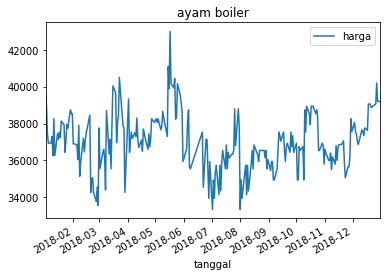

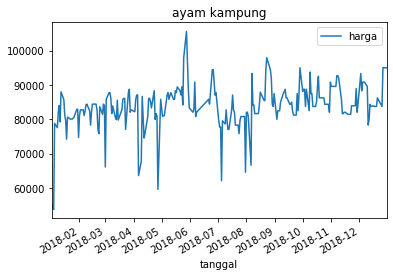

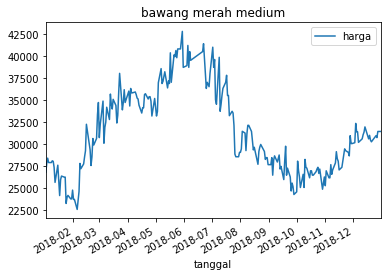

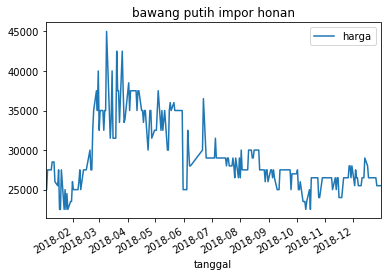

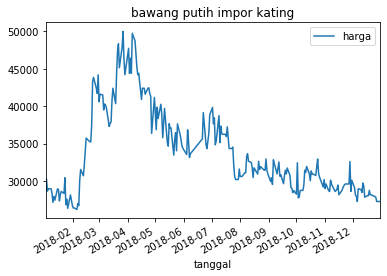

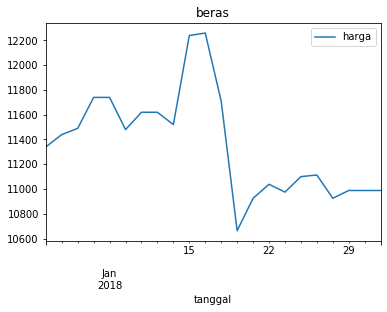

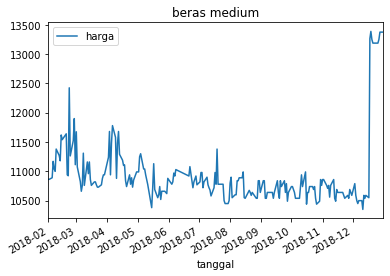

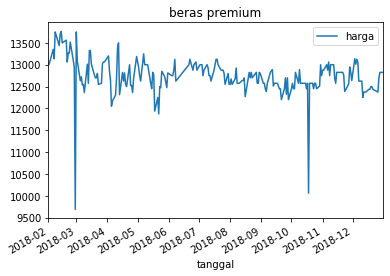

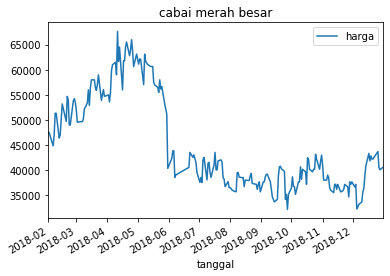

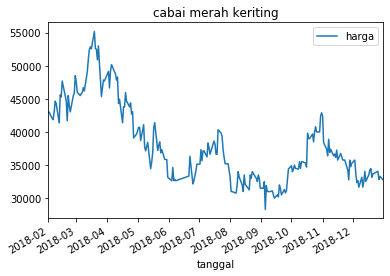

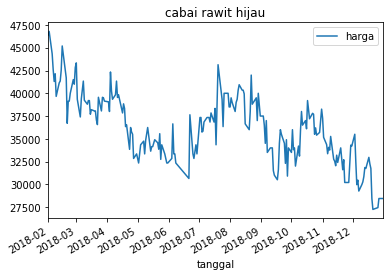

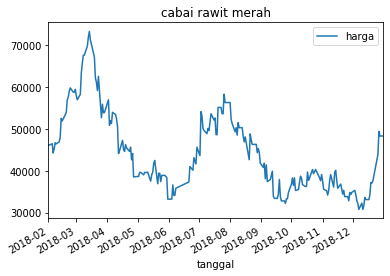

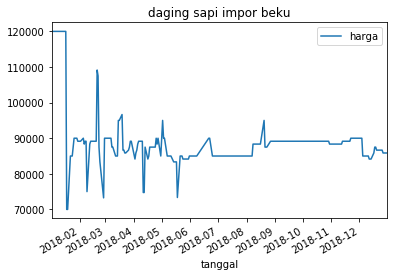

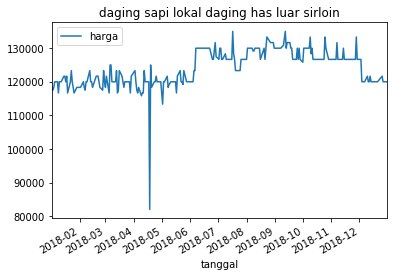

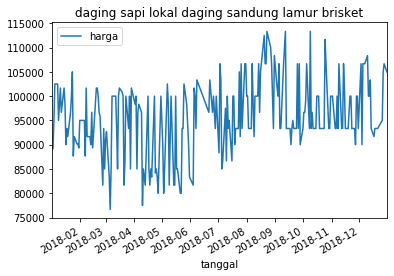

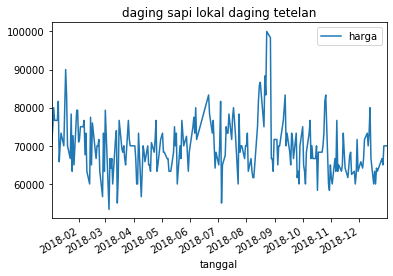

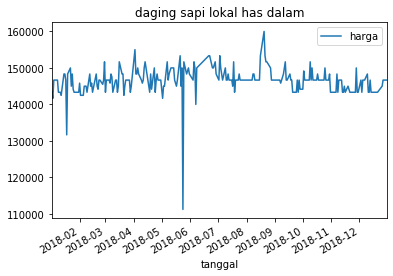

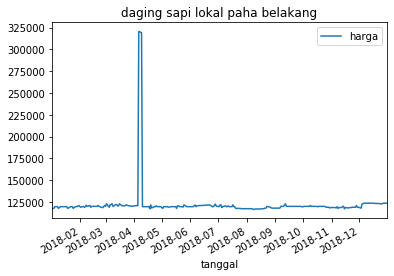

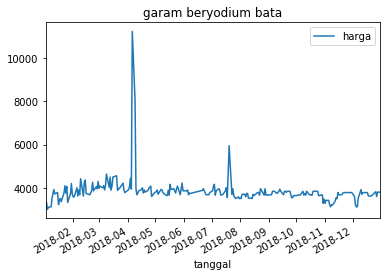

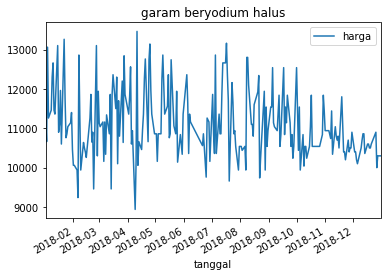

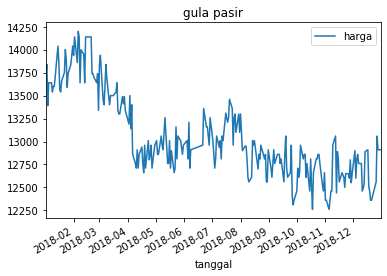

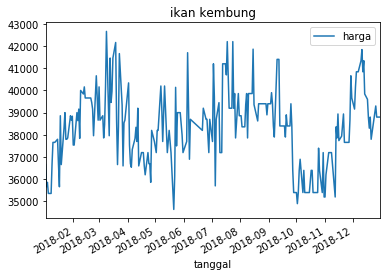

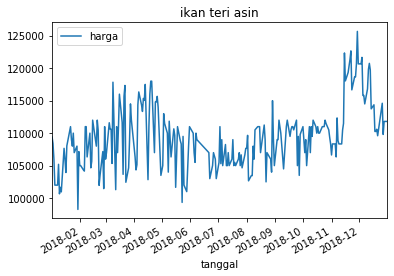

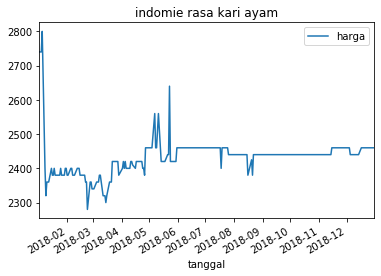

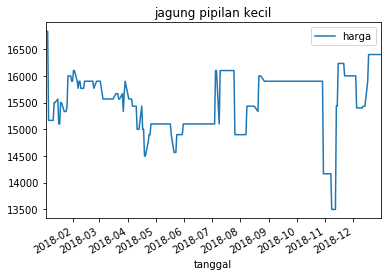

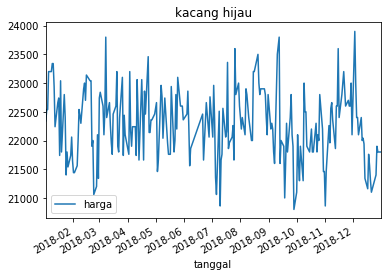

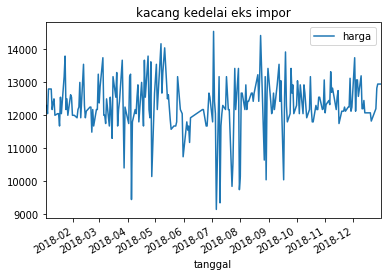

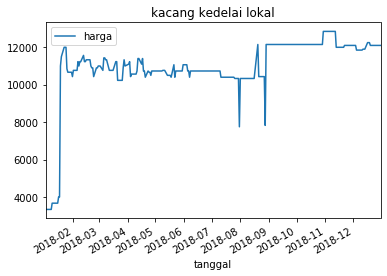

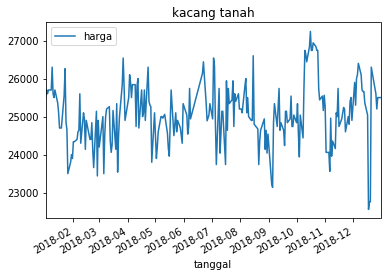

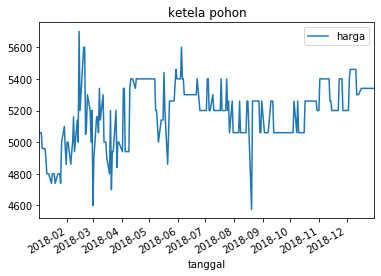

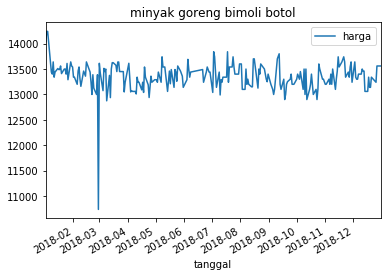

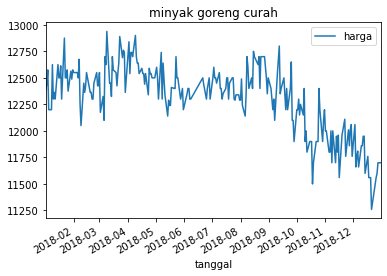

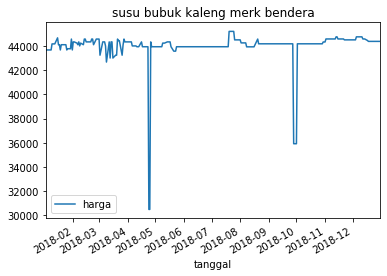

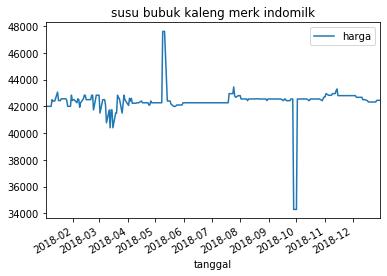

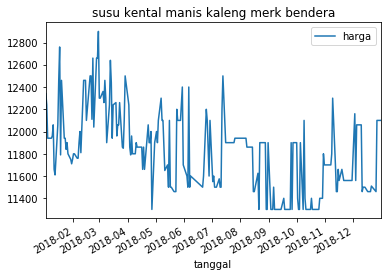

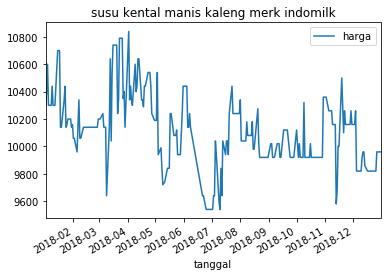

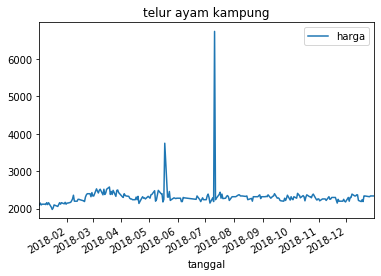

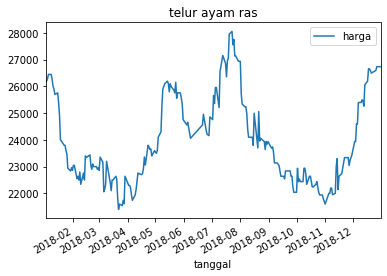

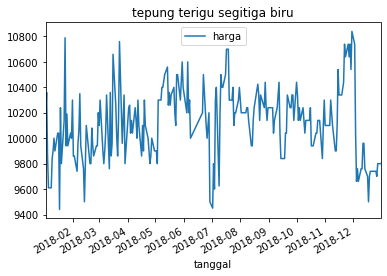

In [250]:
import matplotlib.pyplot as plt
j=0
for i in x:
    arr[j].plot(kind="line",x="tanggal",y="harga",title=i)
    j+=1

In [251]:
j=0
arr[0].rename(columns={'harga':'harga '+ x[0]},inplace=True)
arr[0] = arr[0].drop("komoditi",axis = 1)
save=arr[0]

/home/ardyh/.local/lib/python3.6/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [252]:
for i in range(1,39):
    arr[i] = arr[i].drop("komoditi",axis = 1)
    arr[i].rename(columns={'harga':'harga '+ x[i]},inplace=True)
    save=pd.merge(save, arr[i], how='outer', on='tanggal')

In [253]:
save

,tanggal,harga ayam boiler,harga ayam kampung,harga bawang merah medium,harga bawang putih impor honan,harga bawang putih impor kating,harga beras,harga beras medium,harga beras premium,harga cabai merah besar,...,harga ketela pohon,harga minyak goreng bimoli botol,harga minyak goreng curah,harga susu bubuk kaleng merk bendera,harga susu bubuk kaleng merk indomilk,harga susu kental manis kaleng merk bendera,harga susu kental manis kaleng merk indomilk,harga telur ayam kampung,harga telur ayam ras,harga tepung terigu segitiga biru
0,2018-01-02,39740.0,55075.0,26800.0,25000.0,28560.0,11340.0,NaN,NaN,NaN,...,5060.0,14040.0,12388.0,43667.0,42000.0,12340.0,10300.0,2100.0,26150.0,10160.0
1,2018-01-03,38940.0,55075.0,27800.0,25000.0,30260.0,11440.0,NaN,NaN,NaN,...,5060.0,14240.0,12450.0,43667.0,42000.0,12240.0,10400.0,2150.0,26200.0,10360.0
2,2018-01-04,37440.0,53825.0,28400.0,27500.0,28660.0,11490.0,NaN,NaN,NaN,...,5060.0,14240.0,12575.0,43667.0,42000.0,11940.0,10600.0,2100.0,26300.0,9860.0
3,2018-01-05,36940.0,78825.0,27900.0,27500.0,28960.0,11740.0,NaN,NaN,NaN,...,4960.0,14040.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
4,2018-01-08,36940.0,77575.0,27900.0,27500.0,28960.0,11740.0,NaN,NaN,NaN,...,4960.0,13440.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
5,2018-01-09,37300.0,82100.0,28100.0,28500.0,28340.0,11480.0,NaN,NaN,NaN,...,4900.0,13400.0,12625.0,44167.0,42500.0,11960.0,10440.0,2110.0,26260.0,9840.0
6,2018-01-10,36260.0,84000.0,28040.0,28500.0,27140.0,11620.0,NaN,NaN,NaN,...,4800.0,13640.0,12300.0,44167.0,42400.0,12060.0,10300.0,2160.0,26000.0,9900.0
7,2018-01-11,38260.0,79250.0,27340.0,28500.0,27940.0,11620.0,NaN,NaN,NaN,...,4800.0,13340.0,12363.0,44167.0,42400.0,11660.0,10300.0,2110.0,25900.0,10000.0
8,2018-01-12,36260.0,88000.0,25640.0,26000.0,27440.0,11520.0,NaN,NaN,NaN,...,4800.0,13440.0,12300.0,44167.0,42400.0,11610.0,10300.0,2160.0,25700.0,9900.0
9,2018-01-15,37460.0,85767.0,27600.0,25500.0,28960.0,12240.0,NaN,NaN,NaN,...,4740.0,13510.0,12625.0,44667.0,43067.0,12060.0,10700.0,2040.0,25760.0,10040.0


In [254]:
for i in range(0,22):
    save['harga beras medium'].iloc[i] = save['harga beras'].iloc[i]
    save['harga beras premium'].iloc[i] = save['harga beras'].iloc[i]

/home/ardyh/.local/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [255]:
save

,tanggal,harga ayam boiler,harga ayam kampung,harga bawang merah medium,harga bawang putih impor honan,harga bawang putih impor kating,harga beras,harga beras medium,harga beras premium,harga cabai merah besar,...,harga ketela pohon,harga minyak goreng bimoli botol,harga minyak goreng curah,harga susu bubuk kaleng merk bendera,harga susu bubuk kaleng merk indomilk,harga susu kental manis kaleng merk bendera,harga susu kental manis kaleng merk indomilk,harga telur ayam kampung,harga telur ayam ras,harga tepung terigu segitiga biru
0,2018-01-02,39740.0,55075.0,26800.0,25000.0,28560.0,11340.0,11340.0,11340.0,NaN,...,5060.0,14040.0,12388.0,43667.0,42000.0,12340.0,10300.0,2100.0,26150.0,10160.0
1,2018-01-03,38940.0,55075.0,27800.0,25000.0,30260.0,11440.0,11440.0,11440.0,NaN,...,5060.0,14240.0,12450.0,43667.0,42000.0,12240.0,10400.0,2150.0,26200.0,10360.0
2,2018-01-04,37440.0,53825.0,28400.0,27500.0,28660.0,11490.0,11490.0,11490.0,NaN,...,5060.0,14240.0,12575.0,43667.0,42000.0,11940.0,10600.0,2100.0,26300.0,9860.0
3,2018-01-05,36940.0,78825.0,27900.0,27500.0,28960.0,11740.0,11740.0,11740.0,NaN,...,4960.0,14040.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
4,2018-01-08,36940.0,77575.0,27900.0,27500.0,28960.0,11740.0,11740.0,11740.0,NaN,...,4960.0,13440.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
5,2018-01-09,37300.0,82100.0,28100.0,28500.0,28340.0,11480.0,11480.0,11480.0,NaN,...,4900.0,13400.0,12625.0,44167.0,42500.0,11960.0,10440.0,2110.0,26260.0,9840.0
6,2018-01-10,36260.0,84000.0,28040.0,28500.0,27140.0,11620.0,11620.0,11620.0,NaN,...,4800.0,13640.0,12300.0,44167.0,42400.0,12060.0,10300.0,2160.0,26000.0,9900.0
7,2018-01-11,38260.0,79250.0,27340.0,28500.0,27940.0,11620.0,11620.0,11620.0,NaN,...,4800.0,13340.0,12363.0,44167.0,42400.0,11660.0,10300.0,2110.0,25900.0,10000.0
8,2018-01-12,36260.0,88000.0,25640.0,26000.0,27440.0,11520.0,11520.0,11520.0,NaN,...,4800.0,13440.0,12300.0,44167.0,42400.0,11610.0,10300.0,2160.0,25700.0,9900.0
9,2018-01-15,37460.0,85767.0,27600.0,25500.0,28960.0,12240.0,12240.0,12240.0,NaN,...,4740.0,13510.0,12625.0,44667.0,43067.0,12060.0,10700.0,2040.0,25760.0,10040.0


In [256]:
save = save.drop("harga beras",axis = 1)

In [257]:
save

,tanggal,harga ayam boiler,harga ayam kampung,harga bawang merah medium,harga bawang putih impor honan,harga bawang putih impor kating,harga beras medium,harga beras premium,harga cabai merah besar,harga cabai merah keriting,...,harga ketela pohon,harga minyak goreng bimoli botol,harga minyak goreng curah,harga susu bubuk kaleng merk bendera,harga susu bubuk kaleng merk indomilk,harga susu kental manis kaleng merk bendera,harga susu kental manis kaleng merk indomilk,harga telur ayam kampung,harga telur ayam ras,harga tepung terigu segitiga biru
0,2018-01-02,39740.0,55075.0,26800.0,25000.0,28560.0,11340.0,11340.0,NaN,NaN,...,5060.0,14040.0,12388.0,43667.0,42000.0,12340.0,10300.0,2100.0,26150.0,10160.0
1,2018-01-03,38940.0,55075.0,27800.0,25000.0,30260.0,11440.0,11440.0,NaN,NaN,...,5060.0,14240.0,12450.0,43667.0,42000.0,12240.0,10400.0,2150.0,26200.0,10360.0
2,2018-01-04,37440.0,53825.0,28400.0,27500.0,28660.0,11490.0,11490.0,NaN,NaN,...,5060.0,14240.0,12575.0,43667.0,42000.0,11940.0,10600.0,2100.0,26300.0,9860.0
3,2018-01-05,36940.0,78825.0,27900.0,27500.0,28960.0,11740.0,11740.0,NaN,NaN,...,4960.0,14040.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
4,2018-01-08,36940.0,77575.0,27900.0,27500.0,28960.0,11740.0,11740.0,NaN,NaN,...,4960.0,13440.0,12200.0,43667.0,42000.0,11940.0,10300.0,2120.0,26450.0,9610.0
5,2018-01-09,37300.0,82100.0,28100.0,28500.0,28340.0,11480.0,11480.0,NaN,NaN,...,4900.0,13400.0,12625.0,44167.0,42500.0,11960.0,10440.0,2110.0,26260.0,9840.0
6,2018-01-10,36260.0,84000.0,28040.0,28500.0,27140.0,11620.0,11620.0,NaN,NaN,...,4800.0,13640.0,12300.0,44167.0,42400.0,12060.0,10300.0,2160.0,26000.0,9900.0
7,2018-01-11,38260.0,79250.0,27340.0,28500.0,27940.0,11620.0,11620.0,NaN,NaN,...,4800.0,13340.0,12363.0,44167.0,42400.0,11660.0,10300.0,2110.0,25900.0,10000.0
8,2018-01-12,36260.0,88000.0,25640.0,26000.0,27440.0,11520.0,11520.0,NaN,NaN,...,4800.0,13440.0,12300.0,44167.0,42400.0,11610.0,10300.0,2160.0,25700.0,9900.0
9,2018-01-15,37460.0,85767.0,27600.0,25500.0,28960.0,12240.0,12240.0,NaN,NaN,...,4740.0,13510.0,12625.0,44667.0,43067.0,12060.0,10700.0,2040.0,25760.0,10040.0


In [258]:
save.isnull().sum()

tanggal                                                  0
harga ayam boiler                                        0
harga ayam kampung                                       0
harga bawang merah medium                                0
harga bawang putih impor honan                           0
harga bawang putih impor kating                          0
harga beras medium                                       0
harga beras premium                                      0
harga cabai merah besar                                 22
harga cabai merah keriting                              22
harga cabai rawit hijau                                 22
harga cabai rawit merah                                 22
harga daging sapi impor beku                             0
harga daging sapi lokal daging has luar sirloin          0
harga daging sapi lokal daging sandung lamur brisket     0
harga daging sapi lokal daging tetelan                   0
harga daging sapi lokal has dalam                       

In [259]:
save.columns

Index(['tanggal', 'harga ayam boiler', 'harga ayam kampung',
       'harga bawang merah medium', 'harga bawang putih impor honan',
       'harga bawang putih impor kating', 'harga beras medium',
       'harga beras premium', 'harga cabai merah besar',
       'harga cabai merah keriting', 'harga cabai rawit hijau',
       'harga cabai rawit merah', 'harga daging sapi impor beku',
       'harga daging sapi lokal daging has luar sirloin',
       'harga daging sapi lokal daging sandung lamur brisket',
       'harga daging sapi lokal daging tetelan',
       'harga daging sapi lokal has dalam',
       'harga daging sapi lokal paha belakang', 'harga garam beryodium bata',
       'harga garam beryodium halus', 'harga gula pasir', 'harga ikan kembung',
       'harga ikan teri asin', 'harga indomie rasa kari ayam',
       'harga jagung pipilan kecil', 'harga kacang hijau',
       'harga kacang kedelai eks impor', 'harga kacang kedelai lokal',
       'harga kacang tanah', 'harga ketela pohon',
  

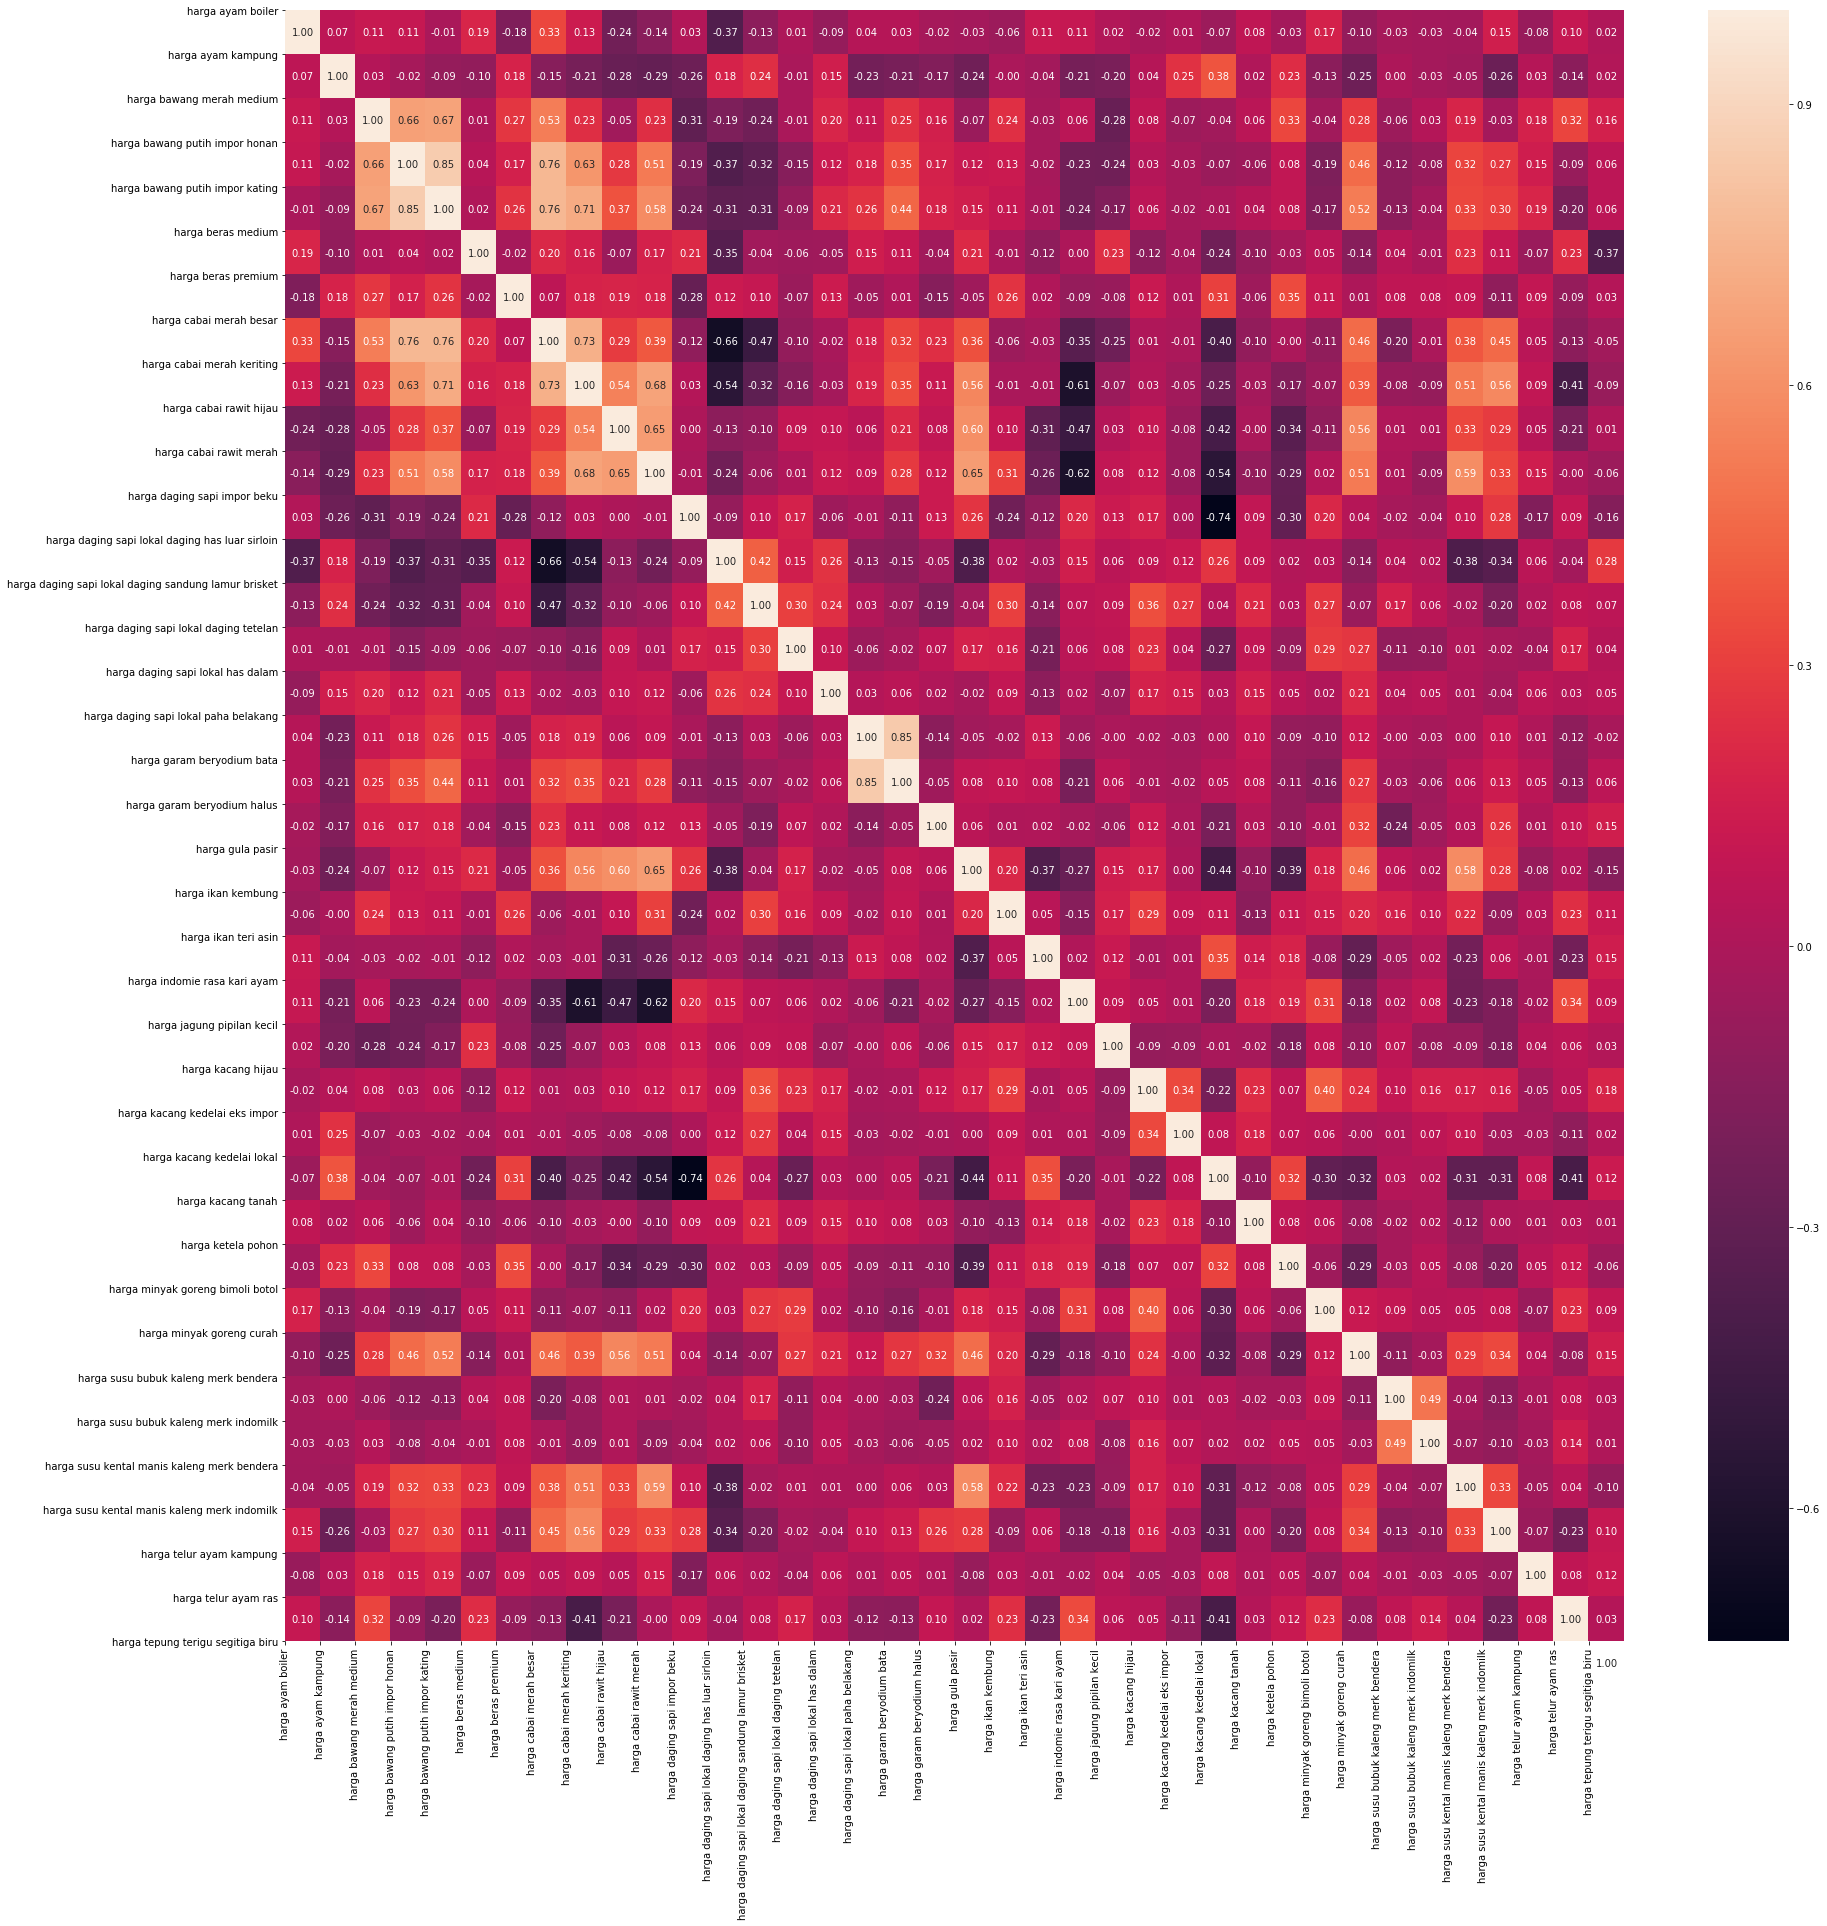

In [260]:
import numpy as np
import seaborn as sns
train_corr = save
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
  
f, ax = plt.subplots(figsize=(30, 30))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [261]:
save.to_csv("semua_v2.csv",index = False)

In [262]:
corr

,harga ayam boiler,harga ayam kampung,harga bawang merah medium,harga bawang putih impor honan,harga bawang putih impor kating,harga beras medium,harga beras premium,harga cabai merah besar,harga cabai merah keriting,harga cabai rawit hijau,...,harga ketela pohon,harga minyak goreng bimoli botol,harga minyak goreng curah,harga susu bubuk kaleng merk bendera,harga susu bubuk kaleng merk indomilk,harga susu kental manis kaleng merk bendera,harga susu kental manis kaleng merk indomilk,harga telur ayam kampung,harga telur ayam ras,harga tepung terigu segitiga biru
harga ayam boiler,1.000000,0.072998,0.108895,0.105403,-0.010728,0.190633,-0.181363,0.332992,0.129677,-0.235982,...,-0.031811,0.173264,-0.100454,-0.025506,-0.027837,-0.036318,0.152430,-0.079847,0.104228,0.019465
harga ayam kampung,0.072998,1.000000,0.032493,-0.022095,-0.091217,-0.102818,0.179939,-0.149618,-0.212102,-0.277228,...,0.230287,-0.131564,-0.246939,0.002256,-0.028548,-0.049763,-0.260973,0.033876,-0.135506,0.024866
harga bawang merah medium,0.108895,0.032493,1.000000,0.660224,0.674124,0.008448,0.267816,0.525826,0.234804,-0.046036,...,0.327544,-0.042998,0.282982,-0.062258,0.030232,0.185379,-0.029812,0.175576,0.324711,0.164117
harga bawang putih impor honan,0.105403,-0.022095,0.660224,1.000000,0.852795,0.040634,0.166798,0.761855,0.625580,0.278464,...,0.081840,-0.186593,0.457133,-0.123701,-0.078133,0.324738,0.273029,0.145883,-0.088422,0.061530
harga bawang putih impor kating,-0.010728,-0.091217,0.674124,0.852795,1.000000,0.019475,0.256583,0.762586,0.710830,0.372752,...,0.082814,-0.172242,0.519627,-0.126792,-0.037439,0.332146,0.301191,0.193409,-0.200903,0.063495
harga beras medium,0.190633,-0.102818,0.008448,0.040634,0.019475,1.000000,-0.023744,0.204406,0.160742,-0.073936,...,-0.026198,0.048931,-0.144093,0.041110,-0.012216,0.232368,0.105289,-0.074067,0.225720,-0.374906
harga beras premium,-0.181363,0.179939,0.267816,0.166798,0.256583,-0.023744,1.000000,0.070469,0.178019,0.187661,...,0.346256,0.109528,0.005922,0.078419,0.075328,0.093658,-0.114735,0.093195,-0.090541,0.026923
harga cabai merah besar,0.332992,-0.149618,0.525826,0.761855,0.762586,0.204406,0.070469,1.000000,0.728906,0.288177,...,-0.003771,-0.111425,0.461452,-0.195778,-0.005593,0.384185,0.454072,0.053730,-0.133252,-0.046298
harga cabai merah keriting,0.129677,-0.212102,0.234804,0.625580,0.710830,0.160742,0.178019,0.728906,1.000000,0.539140,...,-0.165514,-0.070425,0.394587,-0.078244,-0.090009,0.508903,0.564935,0.087694,-0.410930,-0.087773
harga cabai rawit hijau,-0.235982,-0.277228,-0.046036,0.278464,0.372752,-0.073936,0.187661,0.288177,0.539140,1.000000,...,-0.340274,-0.112727,0.563274,0.014034,0.008566,0.332335,0.287977,0.045404,-0.205525,0.007316


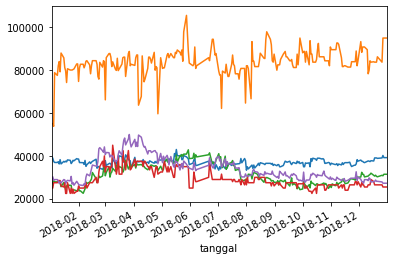

In [264]:
save.plot(kind="line",x="tanggal",y=['harga ayam boiler', 'harga ayam kampung',
       'harga bawang merah medium', 'harga bawang putih impor honan',
       'harga bawang putih impor kating']).get_legend().remove()